In [24]:
!pip install eto
import os
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import bmi_cfe
import bmi_PET
from fao_pet import ETRCalculator
import matplotlib.pyplot as plt
from bmi_cfe import BMI_CFE

In [25]:
# pip install dataretrieval

# 1. Run Normal CFE Simulations

In [26]:
cfe_instance = bmi_cfe.BMI_CFE('./trial_calib/cat-3400554whole.json')

In [27]:
cfe_instance.initialize()

In [28]:
# pet_instance = bmi_PET.BMI_pet_model()
# pet_instance.update()
# pet_instance.finalize()
df = pd.read_csv('./trial_calib/cat-3400554whole.csv')
pet = (df['pet'])

In [29]:
pet

0       6.620000e-08
1      -1.550000e-09
2      -1.390000e-09
3      -1.670000e-09
4      -1.750000e-09
            ...     
9523    6.870000e-08
9524    8.740000e-08
9525    9.480000e-08
9526    8.570000e-08
9527    6.570000e-08
Name: pet, Length: 9528, dtype: float64

In [30]:
with open(cfe_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    
outputs = cfe_instance.get_output_var_names()
output_lists = {output:[] for output in outputs}

for t, precip in enumerate(df['prcp']):
    # print(t)
    precip = (3*precip)/1000
    cfe_instance.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)    
    
    cfe_instance.set_value('water_potential_evaporation_flux', pet[t])
   
    cfe_instance.update()
    
    for output in outputs:
    
        output_lists[output].append(cfe_instance.get_value(output))
    # df_output = pd.DataFrame(output_lists)

In [31]:
cfe_instance.finalize(print_mass_balance=True)


GLOBAL MASS BALANCE
  initial volume:  10.6166
    volume input:   1.7043
   volume output:   3.0418
    final volume:   9.2790
        residual: 3.3807e-06

PARTITION MASS BALANCE
    surface runoff:   0.3848
      infiltration:   1.2703
 vol. et from rain:   0.0493
partition residual: 1.9845e-15

GIUH MASS BALANCE
  vol. into giuh:   0.3848
   vol. out giuh:   0.3848
 vol. end giuh q:   0.0000
   giuh residual: 0.0000e+00

SOIL WATER MASS BALANCE
     init soil vol:   0.6166
    vol. into soil:   1.2703
  vol.soil2latflow:   1.1478
   vol. soil to gw:   0.0251
 vol. et from soil:   0.4537
   final vol. soil:   0.2603
  vol. soil resid.: 3.3807e-06

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   1.1478
  vol. from nash:   1.1445
 final vol. nash:   0.0032
nash casc resid.: -1.1506e-15

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:  10.0000
       vol to gw:   0.0251
     vol from gw:   1.0063
final gw.storage:   9.0187
    gw. residual: 1.5987e-1

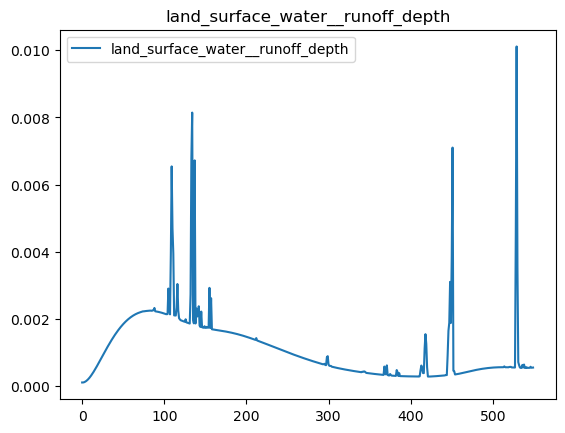

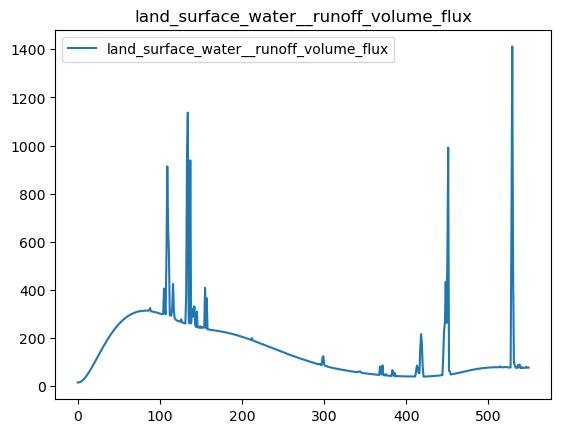

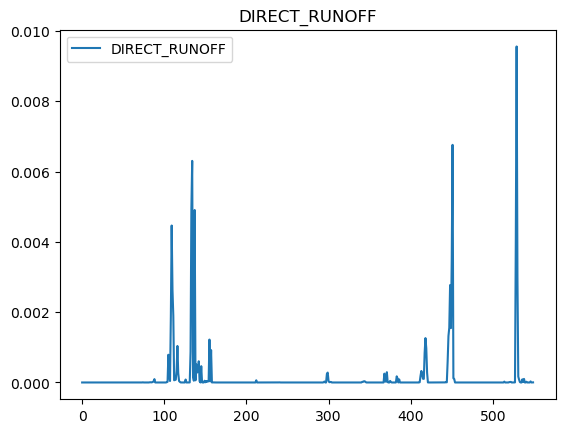

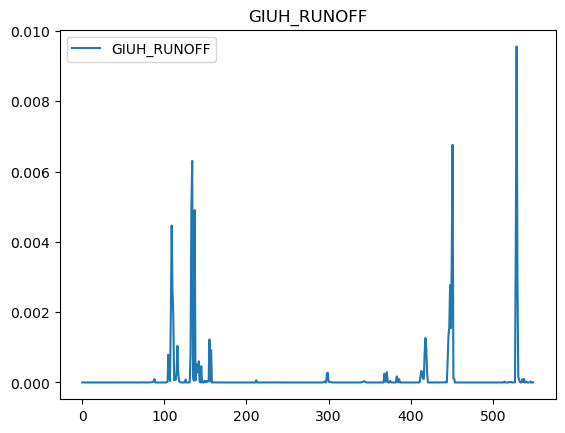

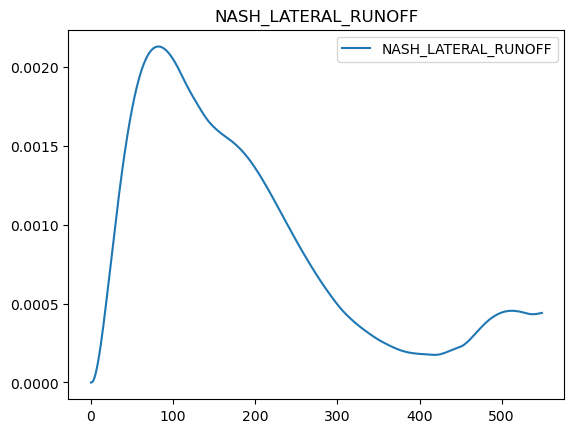

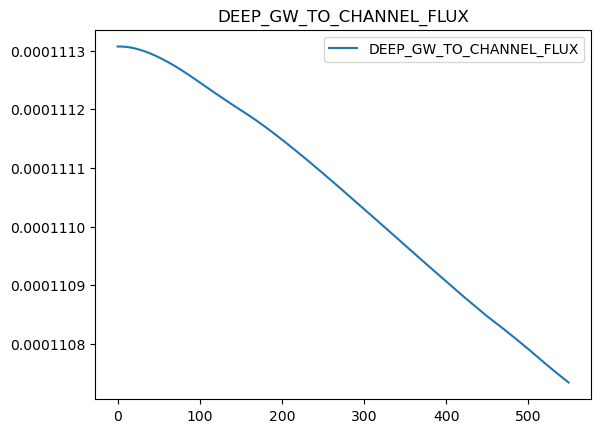

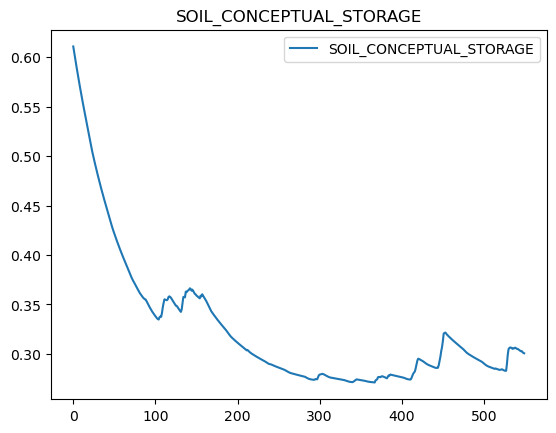

In [32]:
istart_plot = 0
iend_plot = 550
x = list(range(istart_plot, iend_plot))
for output in outputs:
    plt.plot(x, output_lists[output][istart_plot:iend_plot], label=output)
    plt.title(output)
    plt.legend()
    plt.show()
    plt.close()

In [33]:
discharge_cfe = np.array(output_lists['land_surface_water__runoff_volume_flux'])

In [34]:
# file = pd.read_csv('./output_dir/calibration/cat-3400554whole_output.csv')
# discharge1 = file['land_surface_water__runoff_volume_flux']
# giuh1 = file['GIUH_RUNOFF']
# lateral1 = file['NASH_LATERAL_RUNOFF']
# gw1 = file['DEEP_GW_TO_CHANNEL_FLUX']

In [35]:
import dataretrieval.nwis as nwis
import pandas as pd

discharge_nwis = nwis.get_record(sites="11143200", parameterCd='00060', start="2016-12-31", end="2017-01-31")
discharge_resampled = discharge_nwis.select_dtypes(include=['float64', 'int64']).resample('H').mean() # Hourly averaged value
discharge_dataframe = discharge_resampled


In [36]:
discharge_usgs1 = discharge_resampled['00060'].values
discharge_usgs = discharge_usgs1/35.315

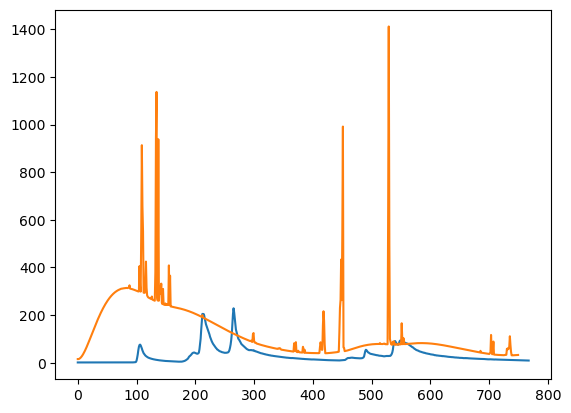

In [37]:
plt.plot(discharge_usgs)
plt.plot(discharge_cfe[0:750])
# plt.plot(discharge1/3600)